In [314]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

In [315]:
all_scores = pd.read_csv('./scores/scores_all.csv', index_col=0).T
deg_scores = pd.read_csv('./scores/scores_degree_centrality.csv', index_col=0).T
page_scores = pd.read_csv('./scores/scores_page_rank.csv', index_col=0).T
lpa_scores = pd.read_csv('./scores/scores_lpa_community.csv', index_col=0).T
none_scores = pd.read_csv('./scores/scores_none.csv', index_col=0).T

In [316]:
all_score_change = (all_scores-none_scores).mean(axis=1)
deg_cent_change = (deg_scores-none_scores).mean(axis=1)
lpa_com_change = (lpa_scores-none_scores).mean(axis=1)
page_rank_change = (page_scores-none_scores).mean(axis=1)

Text(0.5, 1.0, 'Score increase average in percent')

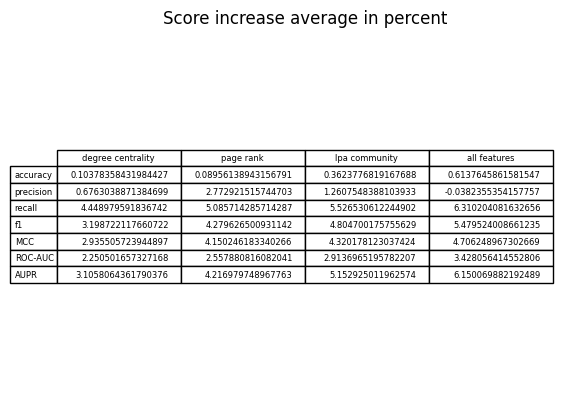

In [317]:
score_changes = pd.concat([deg_cent_change, page_rank_change, lpa_com_change, all_score_change], axis=1)
score_changes.columns = ['degree centrality', 'page rank', 'lpa community', 'all features']
plt.axis('off')
plt.table(cellText = score_changes.values, rowLabels = score_changes.index, colLabels = score_changes.columns, loc='center')
plt.title('Score increase average in percent')

In [318]:
all_scores['hue'] = 'all'
deg_scores['hue'] = 'deg'
page_scores['hue'] = 'page'
lpa_scores['hue'] = 'lpa'
none_scores['hue'] = 'none'

In [319]:
def plot_scores(first, second, change, title):
    df = pd.concat([first, second], axis = 0)
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    sns.barplot(data=df, x=df.index, y='Decision Tree', hue='hue', ax=axs[0, 0])
    sns.barplot(data=df, x=df.index, y='Random Forest', hue='hue', ax=axs[0, 1])
    sns.barplot(data=df, x=df.index, y='K-NN', hue='hue', ax=axs[0, 2])
    sns.barplot(data=df, x=df.index, y='MLP', hue='hue', ax=axs[0, 3])
    sns.barplot(data=df, x=df.index, y='SVM', hue='hue', ax=axs[1, 0])
    sns.barplot(data=df, x=df.index, y='LOF', hue='hue', ax=axs[1, 1])
    sns.barplot(data=df, x=df.index, y='IF', hue='hue', ax=axs[1, 2])
    axs[1, 3].axis('off')
    axs[1, 3].table(cellText = np.array([change.values]).T, rowLabels = change.index, colLabels = ['Percent Change'], loc='center', cellLoc='center', colWidths=[.5])
    plt.title('Average percent score increase')
    plt.suptitle(title)
    plt.show()

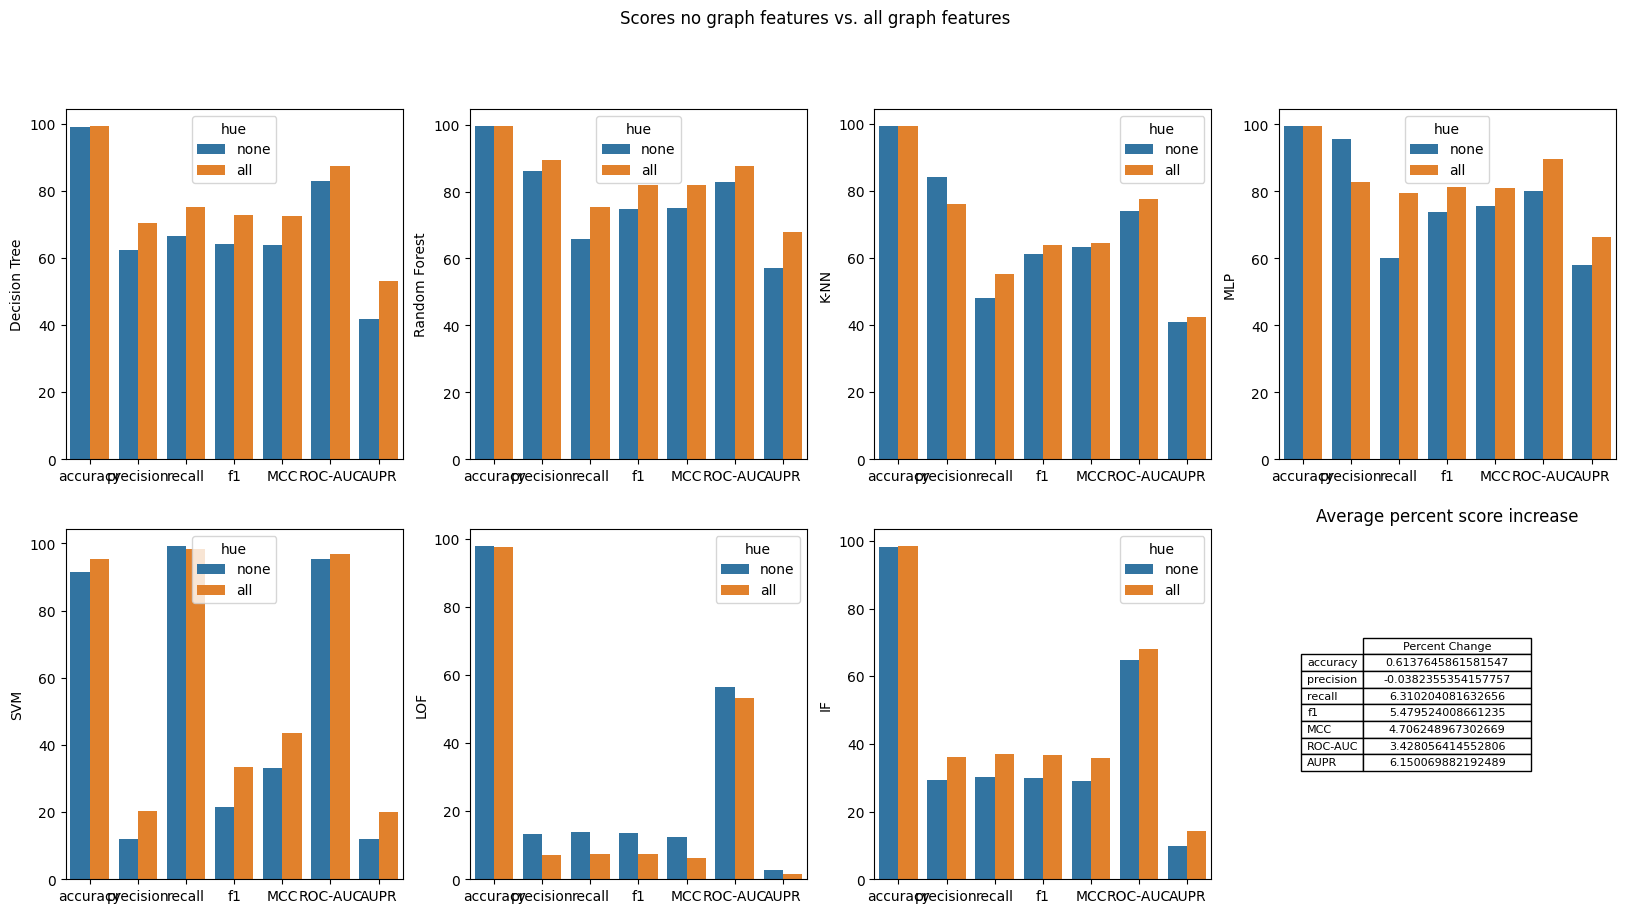

In [320]:
plot_scores(none_scores, all_scores, all_score_change, 'Scores no graph features vs. all graph features')

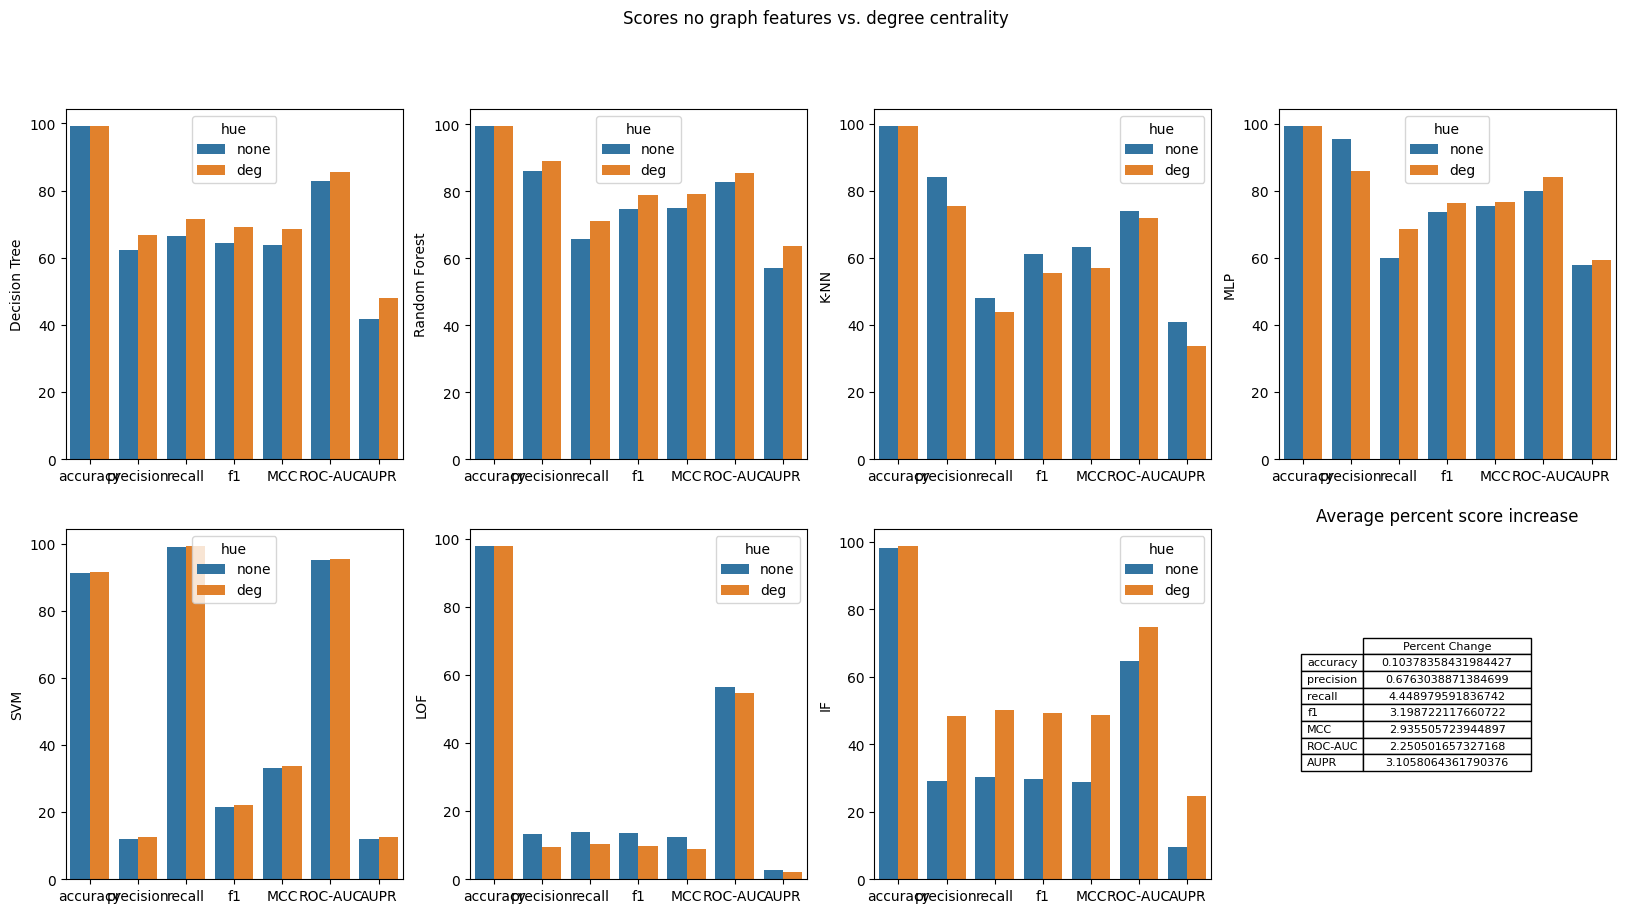

In [321]:
plot_scores(none_scores, deg_scores, deg_cent_change, 'Scores no graph features vs. degree centrality')

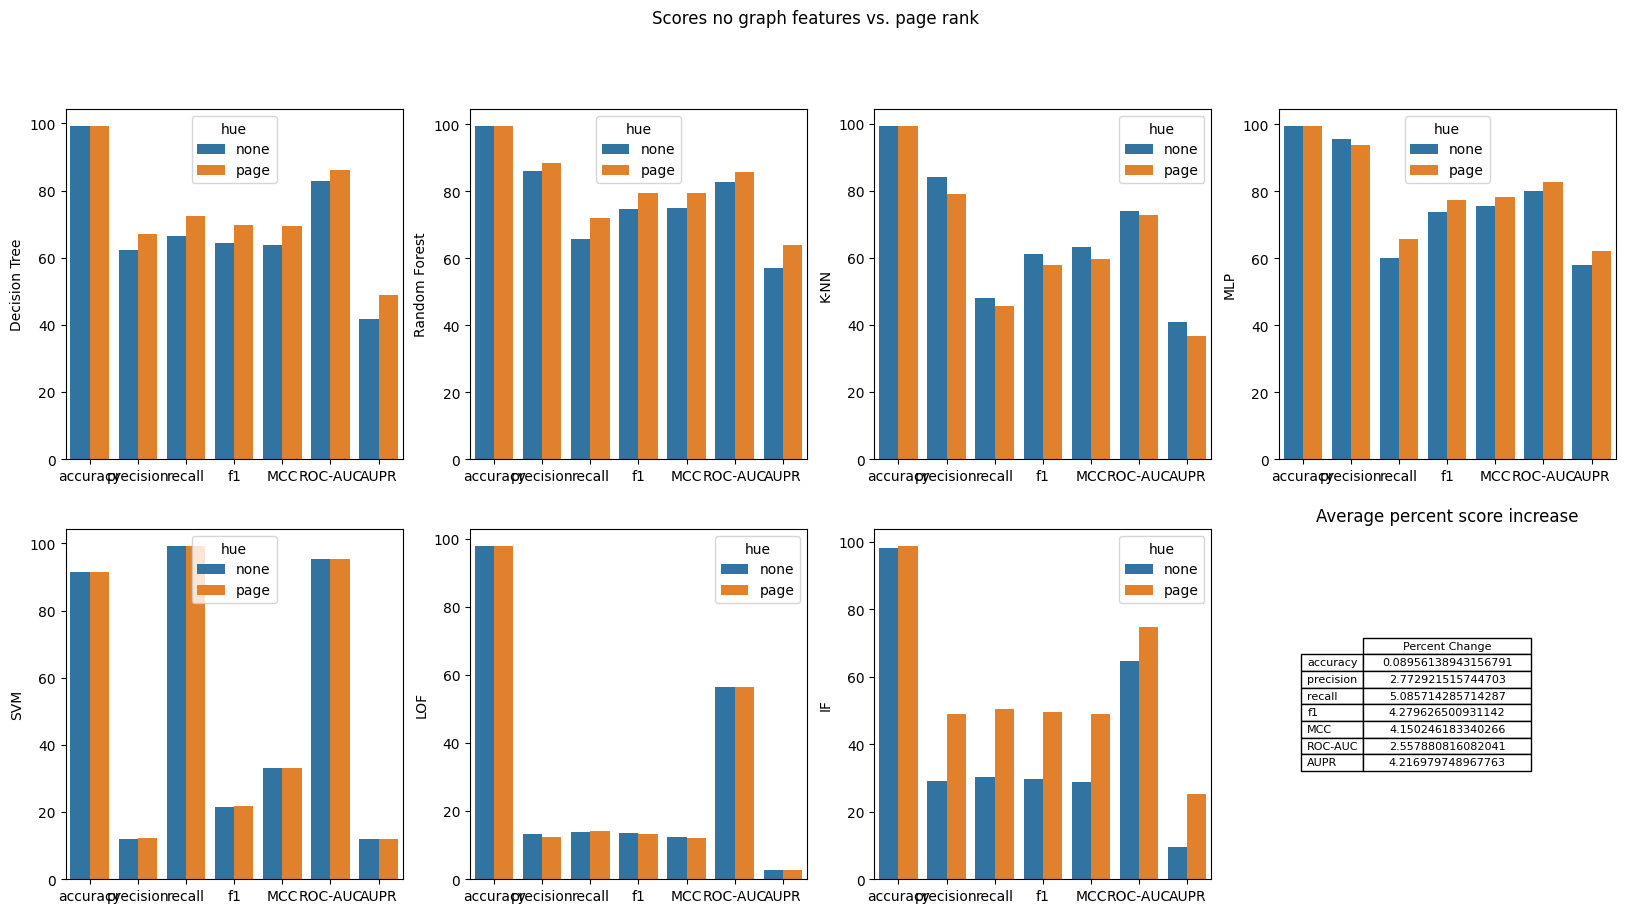

In [322]:
plot_scores(none_scores, page_scores, page_rank_change, 'Scores no graph features vs. page rank')

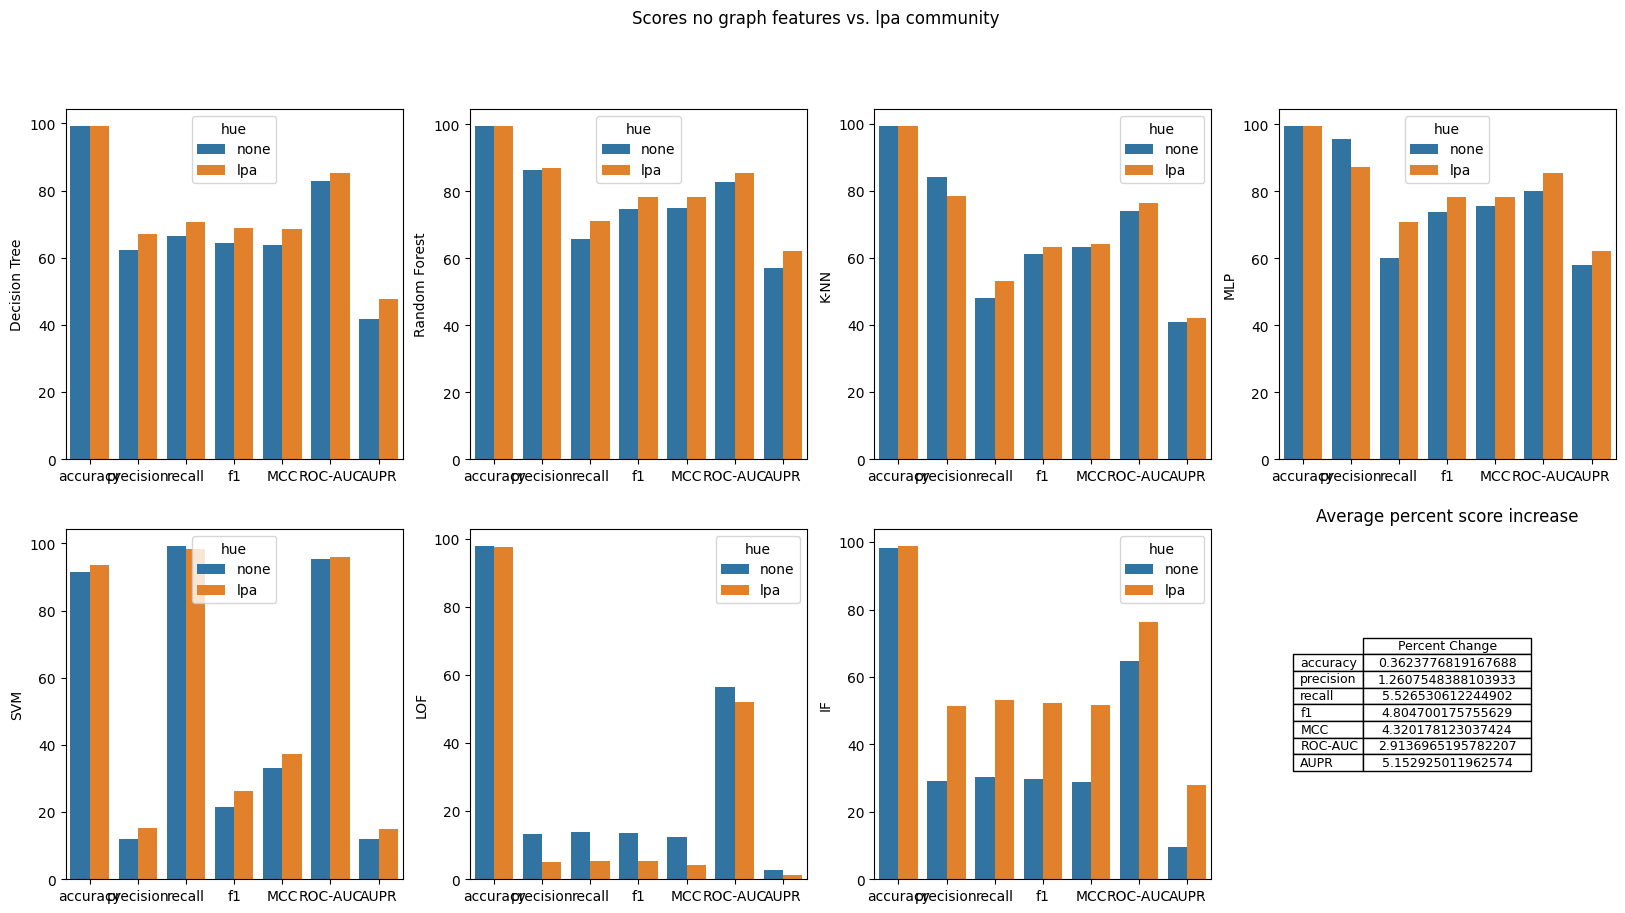

In [323]:
plot_scores(none_scores, lpa_scores, lpa_com_change, 'Scores no graph features vs. lpa community')